# 08_NN_MNIST

In [1]:
# Pytorch Library
import torch
import torch.nn.init
from torch.autograd import Variable



In [4]:
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(777)  # reproducibility

In [5]:
# Other Python Library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

### Loading MNIST dataset

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


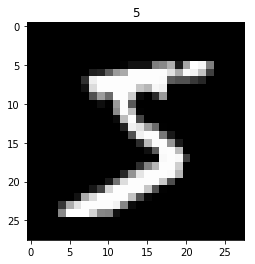

In [7]:
# plot one example
print(mnist_train.train_data.size())                 # (60000, 28, 28)
print(mnist_train.train_labels.size())               # (60000)

idx = 0
plt.imshow(mnist_train.train_data[idx,:,:].numpy(), cmap='gray')
plt.title('%i' % mnist_train.train_labels[idx])

### Data Loader (= 전체 Data를 쪼개서 Batch Size 단위로 불러 오는 역할)

In [8]:
# Hyper-parameters
batch_size = 100

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

torch.Size([100, 1, 28, 28])
torch.Size([100])


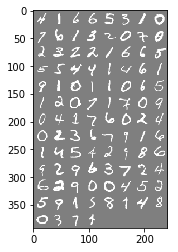

array([4, 1, 6, 6, 5, 3, 1, 0, 7, 6, 1, 3, 2, 0, 7, 0, 2, 3, 2, 2, 1, 6, 6,
       5, 5, 5, 4, 4, 1, 4, 6, 1, 9, 1, 0, 1, 1, 0, 6, 5, 1, 2, 0, 7, 1, 7,
       0, 9, 0, 4, 1, 7, 6, 0, 2, 4, 0, 2, 3, 6, 7, 9, 1, 6, 1, 4, 5, 4, 2,
       9, 8, 6, 9, 2, 9, 6, 3, 7, 2, 4, 6, 2, 9, 0, 0, 4, 5, 2, 5, 9, 1, 5,
       8, 1, 4, 8, 0, 3, 7, 4])

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# #예를 들어서.. data_loader로 부터 데이터 뭉치를 하나만 불러 오자
batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())

# show images and print labels
imshow(utils.make_grid(batch_images))
batch_labels.numpy()

# 실제 사용 예시 for loop를 이용해서 image와 label을 읽어 온다.
# for batch_images, batch_labels in data_loader:
#     print(img.size())
#     print(label)

#enumerate를 사용하는 경우 image와 label을 읽는 것 뿐만 아니라 iter도 같이 계산
# for i, (batch_images, batch_labels) in enumerate(data_loader):
#     print(batch_images.size())
#     print(batch_labels)

### Define Neural Network Model

In [10]:
# Neural Network
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
#sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, relu, linear2)   

#model.load_state_dict(torch.load('NN.pkl'))  # Load the Trained Model
print(model)

Sequential (
  (0): Linear (784 -> 512)
  (1): ReLU ()
  (2): Linear (512 -> 10)
)


### Cost 함수 정의

In [11]:
# Softmax 함수가 Cost를 계산할 때 내장되어 있다.
cost_func = torch.nn.CrossEntropyLoss()    

### Model 학습

In [15]:
# Hyper-parameters
learning_rate = 0.001 
training_epochs = 5

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size

    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        # 이미지를 [batch_size x 784] size 행렬로 변환
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)        # label is not one-hot encoded

        optimizer.zero_grad()             # Zero Gradient Container
        Y_prediction = model(X)           # Forward Propagation
        cost = cost_func(Y_prediction, Y) # compute cost
        cost.backward()                   # compute gradient
        optimizer.step()                  # gradient update

        avg_cost += cost / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data[0]))

print('Learning Finished!')

# torch.save(model.state_dict(), 'NN.pkl')  # Save the Model

[Epoch:    1] cost = 0.0327359401
[Epoch:    2] cost = 0.0230310094
[Epoch:    3] cost = 0.0159843769
[Epoch:    4] cost = 0.0135255037


Process Process-8:
Traceback (most recent call last):
  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py", line 75, in __getitem__
    img = self.transform(img)
  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/site-packages/torchvision/transforms.py", line 83, in __call__
    return img.float().div(255)
  File "/home/isjeon/anaconda3/envs/lab_conda/lib/python3.6/site-packages/torch/tensor.py", line 43, in float
    return self.type(type(self).__modu

In [13]:
model.load_state_dict(torch.load('NN.pkl'))
model.state_dict()

OrderedDict([('0.weight', 
              -2.3496e-02  2.9788e-02 -1.7264e-03  ...   1.1420e-02  3.5596e-03 -2.0659e-02
               2.5164e-03 -1.2785e-02  3.4308e-02  ...  -3.2980e-02  3.2557e-02 -2.6513e-02
              -2.1505e-02 -2.0751e-02  1.2887e-04  ...  -1.3800e-02  1.3477e-03 -2.6379e-02
                              ...                   ⋱                   ...                
              -1.5719e-02 -1.9760e-02  2.7627e-02  ...   3.4418e-02  2.4713e-02  1.6831e-02
              -9.7556e-03 -2.8041e-02  1.8751e-02  ...  -2.5325e-02  1.6545e-02  1.0813e-03
              -3.5254e-02  2.2254e-02  3.4663e-02  ...  -1.6771e-02 -2.2863e-02 -2.9022e-02
              [torch.FloatTensor of size 512x784]), ('0.bias', 
               0.0232
              -0.0276
               0.1362
               0.0535
               0.0070
               0.0246
               0.0375
               0.0019
               0.0503
              -0.0069
              -0.0326
               0.0404
 

### Test Dataset 이용한 모형 성능 측정

In [14]:
# Test the Model
correct = 0
total = 0
for images, labels in mnist_test:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


### Random Sample Test

In [16]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])


Label:  
 8
[torch.LongTensor of size 1]

Prediction:  
 8
[torch.LongTensor of size 1]



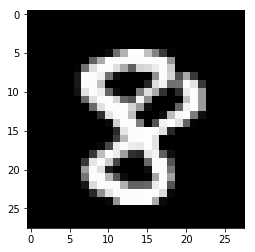

In [17]:
single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy() , cmap='gray')

print("Label: ", Y_single_data.data)
print("Prediction: ", torch.max(single_prediction.data, 1)[1])

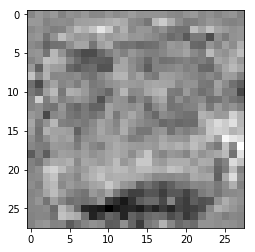

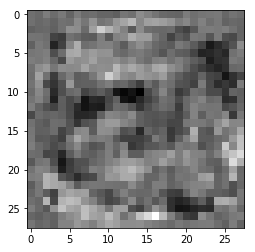

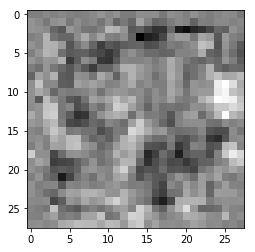

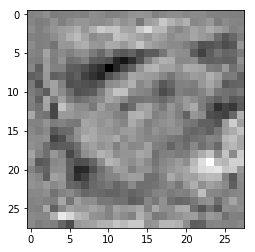

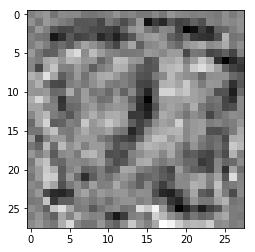

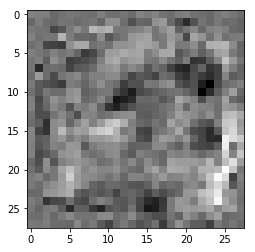

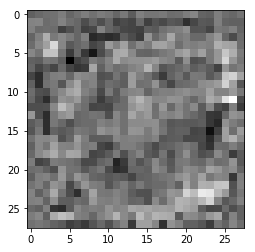

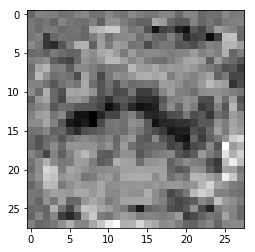

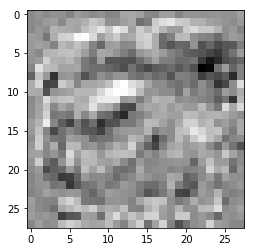

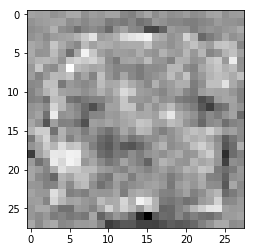

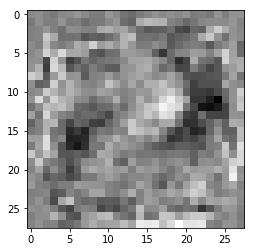

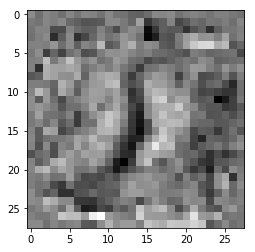

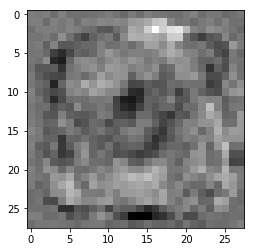

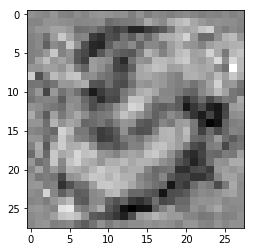

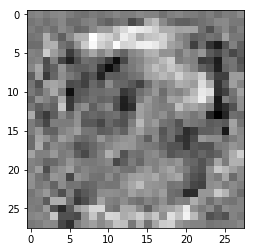

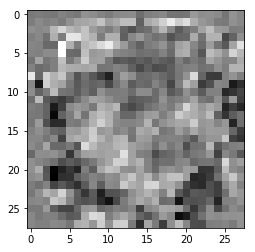

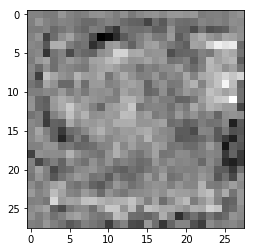

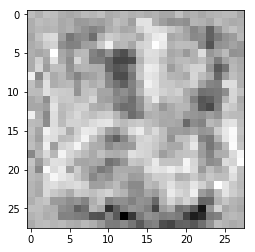

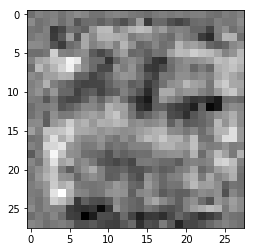

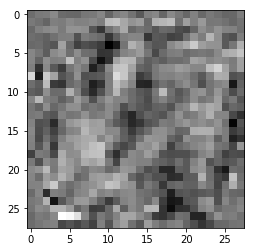

In [18]:
for i in range(20):
    weight = model[0].weight[i,:].data.view(28,28) 
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    plt.imshow( weight.numpy(), cmap='gray')
    plt.show()